<a href="https://colab.research.google.com/github/ram130849/Laptop_Price_Prediction/blob/main/laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# References:
      # https://www.kaggle.com/code/raphaelmarconato/laptop-price-eda-grouping-and-ml-81-80
      # https://www.kaggle.com/code/arnabchaki/deep-feature-engineering
      # https://www.kaggle.com/datasets/arnabchaki/laptop-price-prediction

In [6]:
!unzip /content/laptop_price_prediction.zip -d /content/laptop_price_prediction

Archive:  /content/laptop_price_prediction.zip
  inflating: /content/laptop_price_prediction/laptops_test.csv  
  inflating: /content/laptop_price_prediction/laptops_train.csv  


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn import feature_selection
from statsmodels.graphics.gofplots import qqplot

In [8]:
df_train = pd.read_csv('/content/laptop_price_prediction/laptops_train.csv')
df_test = pd.read_csv('/content/laptop_price_prediction/laptops_test.csv')

In [9]:
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [10]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0


In [11]:
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [13]:
df_train = df_train.rename(columns = str.lower)
df_test = df_test.rename(columns = str.lower)

In [14]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'screen',
       'cpu', 'ram', ' storage', 'gpu', 'operating system',
       'operating system version', 'weight', 'price'],
      dtype='object')

In [15]:
df_train['ram']

0       8GB
1       8GB
2       8GB
3      16GB
4       8GB
       ... 
972    32GB
973     8GB
974    16GB
975     8GB
976     4GB
Name: ram, Length: 977, dtype: object

In [16]:
# Resolution is seperated apart by \d x \d regex pattern where + indicates one or more times.
df_train['resolution'] = df_train['screen'].str.extract(r'(\d+x\d+)')
df_test['resolution'] = df_test['screen'].str.extract(r'(\d+x\d+)')

In [17]:
# In screen the resolution is replaced with empty string to get the screen type.
df_train['screen_type'] = df_train['screen'].replace(r'(\d+x\d+)','', regex = True)
df_test['screen_type'] = df_test['screen'].replace(r'(\d+x\d+)','', regex = True)

In [18]:
# In screen type different string formats are removed.
df_train['screen_type'] = df_train['screen_type'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)

In [19]:
df_train['touchscreen'] = df_train['screen_type'].str.extract(r'(Touchscreen)')
df_train['screen_type'] = df_train['screen_type'].replace(r'(Touchscreen)','', regex = True)

df_test['touchscreen'] = df_test['screen_type'].str.extract(r'(Touchscreen)')
df_test['screen_type'] = df_test['screen_type'].replace(r'(Touchscreen)','', regex = True)

In [20]:
print(df_train['touchscreen'].value_counts())
print(df_test['touchscreen'].value_counts())

Touchscreen    141
Name: touchscreen, dtype: int64
Touchscreen    50
Name: touchscreen, dtype: int64


In [21]:
# Binary Column of whether touchscreen is present or not is created.
df_train['touchscreen'] = df_train['touchscreen'].replace('Touchscreen', 1)
df_train['touchscreen'] = df_train['touchscreen'].replace(np.nan, 0)

df_test['touchscreen'] = df_test['touchscreen'].replace('Touchscreen', 1)
df_test['touchscreen'] = df_test['touchscreen'].replace(np.nan, 0)

In [22]:
print(df_train['touchscreen'].value_counts())
print(df_test['touchscreen'].value_counts())

0.0    836
1.0    141
Name: touchscreen, dtype: int64
0.0    275
1.0     50
Name: touchscreen, dtype: int64


In [23]:
# Different whitespaces with different regex patterns gives multiple counts.
df_train['screen_type'].value_counts()

                             432
                             208
IPS Panel                    206
                              57
IPS Panel                     50
IPS Panel Retina Display      14
IPS Panel                     10
Name: screen_type, dtype: int64

In [24]:
# Replace raw string format into normal string format to remove regex patterns.
df_train['screen_type'] = df_train['screen_type'].replace(r' ','', regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r' ','', regex = True)

df_train['screen_type'].value_counts()

                         697
IPSPanel                 266
IPSPanelRetinaDisplay     14
Name: screen_type, dtype: int64

In [25]:
# Replace one or more whitespaces with np.nan in the screen type column
df_train['screen_type'] = df_train['screen_type'].replace(r'^\s*$', np.nan, regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r'^\s*$', np.nan, regex = True)

df_train['screen_type'].value_counts()

IPSPanel                 266
IPSPanelRetinaDisplay     14
Name: screen_type, dtype: int64

In [26]:
df_train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48,1440x900,NaN,0.0
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20,2560x1600,IPSPanelRetinaDisplay,0.0


In [27]:
df_train = df_train.drop('screen', axis = 1)
df_test = df_test.drop('screen', axis = 1)

In [28]:
df_train['resolution'].value_counts()
df_train['screen_type'].value_counts()

IPSPanel                 266
IPSPanelRetinaDisplay     14
Name: screen_type, dtype: int64

In [29]:
df_train['cpu_freq'] = df_train['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
df_test['cpu_freq'] = df_test['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 

In [30]:
df_train['cpu_freq'] = df_train['cpu_freq'].str.replace('GHz', '')
df_train.rename(columns = {'cpu_freq': 'cpu_freq(GHz)'}, inplace = True)
df_train['cpu_freq(GHz)'] = df_train['cpu_freq(GHz)'].astype(float)

df_test['cpu_freq'] = df_test['cpu_freq'].str.replace('GHz', '')
df_test.rename(columns = {'cpu_freq': 'cpu_freq(GHz)'}, inplace = True)
df_test['cpu_freq(GHz)'] = df_test['cpu_freq(GHz)'].astype(float)

In [31]:
df_train['cpu_freq(GHz)'].value_counts()

2.50    213
2.80    142
2.70    127
1.60    109
1.80     75
2.00     70
1.10     46
2.30     40
2.60     34
2.40     32
2.90     18
3.00     18
1.20     11
2.20      8
1.44      7
1.50      7
1.30      5
3.10      3
3.60      3
2.10      3
1.90      2
3.20      1
1.00      1
0.90      1
1.92      1
Name: cpu_freq(GHz), dtype: int64

In [32]:
df_test['cpu_freq(GHz)'].value_counts()

2.50    80
2.30    46
2.60    42
2.70    38
1.60    25
2.80    23
2.40    20
2.00    16
1.10     7
1.44     5
1.20     4
2.20     3
1.50     3
1.80     3
0.90     3
2.90     3
3.60     2
3.00     1
1.30     1
Name: cpu_freq(GHz), dtype: int64

In [33]:
df_train['cpu']= df_train['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex = True)
df_test['cpu']= df_test['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex = True)

In [34]:
df_train['ram'] = df_train['ram'].str.replace('GB', '')
df_train.rename(columns = {'ram': 'ram(GB)'}, inplace = True)
df_train['ram(GB)'] = df_train['ram(GB)'].astype(float)

df_test['ram'] = df_test['ram'].str.replace('GB', '')
df_test.rename(columns = {'ram': 'ram(GB)'}, inplace = True)
df_test['ram(GB)'] = df_test['ram(GB)'].astype(float)

In [35]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,"13.3""",Intel Core i5,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48,2560x1600,IPSPanelRetinaDisplay,0.0,2.3
1,Apple,Macbook Air,Ultrabook,"13.3""",Intel Core i5,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48,1440x900,NaN,0.0,1.8
2,HP,250 G6,Notebook,"15.6""",Intel Core i5 7200U,8.0,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00,1920x1080,NaN,0.0,2.5
3,Apple,MacBook Pro,Ultrabook,"15.4""",Intel Core i7,16.0,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40,2880x1800,IPSPanelRetinaDisplay,0.0,2.7
4,Apple,MacBook Pro,Ultrabook,"13.3""",Intel Core i5,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20,2560x1600,IPSPanelRetinaDisplay,0.0,3.1


In [36]:
# We can extract lots of informations from this column. We can see that some laptops have 2 hard drives,
# there are 4 differnt types of disks: 'SSD', ''HDD', 'Hybrid' and 'Flash Storage'. 
# We will create new columns to include all these information.
df_train[' storage'].value_counts()

256GB SSD                        318
1TB HDD                          171
512GB SSD                         91
500GB HDD                         79
128GB SSD +  1TB HDD              71
128GB SSD                         62
256GB SSD +  1TB HDD              52
32GB Flash Storage                29
2TB HDD                           14
512GB SSD +  1TB HDD              13
1TB SSD                           11
256GB SSD +  2TB HDD              10
64GB Flash Storage                 9
16GB Flash Storage                 6
256GB Flash Storage                5
32GB SSD                           5
128GB Flash Storage                4
1GB SSD                            4
256GB SSD +  256GB SSD             2
16GB SSD                           2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
128GB SSD +  2TB HDD               2
512GB SSD +  512GB SSD             1
512GB SSD +  256GB SSD             1
64GB SSD                           1
64GB Flash Storage +  1TB HDD      1
2

In [37]:
df_train['storage(GB)'] = df_train[' storage']
df_test['storage(GB)'] = df_test[' storage']

In [38]:
df_train['storage(GB)'] = df_train['storage(GB)'].str.replace('1.0TB','1TB', regex = True)
df_train['storage(GB)'] = df_train['storage(GB)'].str.replace('1TB','1000GB')
df_train['storage(GB)'] = df_train['storage(GB)'].str.replace('2TB','2000GB')
df_train['storage(GB)'] = df_train['storage(GB)'].str.replace('GB','')
df_train['storage(GB)'] = df_train['storage(GB)'].str.replace('flash storage','flash_storage')
df_train['storage(GB)'] = df_train['storage(GB)'].str.lower()

df_test['storage(GB)'] = df_test['storage(GB)'].str.replace('1.0TB','1TB', regex = True)
df_test['storage(GB)'] = df_test['storage(GB)'].str.replace('1TB','1000GB')
df_test['storage(GB)'] = df_test['storage(GB)'].str.replace('2TB','2000GB')
df_test['storage(GB)'] = df_test['storage(GB)'].str.replace('GB','')
df_train['storage(GB)'] = df_train['storage(GB)'].str.replace('flash storage','flash_storage')
df_test['storage(GB)'] = df_test['storage(GB)'].str.lower()

In [39]:
df_test['storage(GB)'].value_counts()

256 ssd                   94
1000 hdd                  53
500 hdd                   53
512 ssd                   27
128 ssd +  1000 hdd       23
256 ssd +  1000 hdd       21
128 ssd                   14
32 flash storage           9
1000 hybrid                8
64 flash storage           6
256 flash storage          3
1000 ssd                   3
2000 hdd                   2
16 flash storage           1
512 ssd +  1000 hybrid     1
256 ssd +  500 hdd         1
1 ssd                      1
16 ssd                     1
256 ssd +  1000 hybrid     1
512 ssd +  1000 hdd        1
512 flash storage          1
32 ssd                     1
Name: storage(GB), dtype: int64

In [40]:
df_train['operating system version']=df_train['operating system version'].fillna(df_train['operating system version'].mode()[0])
df_train.rename(columns = {'operating system version': 'os_version'}, inplace = True)
df_test['operating system version']=df_test['operating system version'].fillna(df_test['operating system version'].mode()[0])
df_test.rename(columns = {'operating system version': 'os_version'}, inplace = True)

In [41]:
(df_train.isnull().sum()/len(df_train))

manufacturer        0.000000
model name          0.000000
category            0.000000
screen size         0.000000
cpu                 0.000000
ram(GB)             0.000000
 storage            0.000000
gpu                 0.000000
operating system    0.000000
os_version          0.000000
weight              0.000000
price               0.000000
resolution          0.000000
screen_type         0.713408
touchscreen         0.000000
cpu_freq(GHz)       0.000000
storage(GB)         0.000000
dtype: float64

In [42]:
df_train['weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df_test['weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df_test['weight'].replace(to_replace='s', value='', regex=True, inplace=True)

In [43]:
df_train['weight'] = df_train['weight'].astype("float64")
df_test['weight'] = df_test['weight'].astype("float64")

In [44]:
df_train['screen size'] = df_train['screen size'].str.strip('"')
df_train['screen size'] = df_train['screen size'].astype('float64')
df_test['screen size'] = df_test['screen size'].str.strip('"')
df_test['screen size'] = df_test['screen size'].astype('float64')

In [45]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,os_version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz),storage(GB)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128 ssd
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,1440x900,NaN,0.0,1.8,128 flash_storage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8.0,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,1920x1080,NaN,0.0,2.5,256 ssd
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16.0,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512 ssd
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256 ssd


In [46]:
df_train['storage(GB)'] = df_train['storage(GB)'].str.replace(r' ','')
df_test['storage(GB)'] = df_test['storage(GB)'].str.replace(r' ','')

df_train['storage(GB)'].value_counts()

256ssd                     318
1000hdd                    171
512ssd                      91
500hdd                      79
128ssd+1000hdd              71
128ssd                      62
256ssd+1000hdd              52
32flash_storage             29
2000hdd                     14
512ssd+1000hdd              13
1000ssd                     11
256ssd+2000hdd              10
64flash_storage              9
16flash_storage              6
256flash_storage             5
32ssd                        5
128flash_storage             4
1ssd                         4
256ssd+256ssd                2
16ssd                        2
1000ssd+1000hdd              2
512ssd+2000hdd               2
128ssd+2000hdd               2
512ssd+512ssd                1
512ssd+256ssd                1
64ssd                        1
64flash_storage+1000hdd      1
256ssd+500hdd                1
1000hdd+1000hdd              1
32hdd                        1
1000hybrid                   1
512flash_storage             1
128hdd  

In [47]:
# Creates (\w+) - (Group 1) 1+ letters/digits/underscores
storage1 = []
storage2 = []

for i in df_train['storage(GB)']:
    if len(re.findall(r'\+', i)) == 1: 
        # Double drive
        one = re.findall(r'(\w+)', i)
        storage1.append(one[0])
        storage2.append(one[1])
    else: 
        # Single drive
        one = re.findall(r'(\w+)', i)
        storage1.append(one[0])
        storage2.append('NaN')

In [48]:
storage_1 = []
storage_2 = []

for i in df_test['storage(GB)']:
    # finds all the rows which contains a + character \ helps to identify that this is not a escape sequence or regex pattern.
    if(len(re.findall(r'\+', i)) == 1): 
        # Double drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append(one[1])
    else: 
        # Single drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append('NaN')

In [49]:
storage1_gb = []
storage1_type = []
for i in storage1:
    storage1_gb.append(re.findall(r'(\d+)', i)[0])
    storage1_type.append(re.findall(r'(\D\w+)', i)[0])

In [50]:
storage2_gb = []
storage2_type = []
for i in storage2:
    if i != 'NaN':
        storage2_type.append(re.findall(r'(\D\w+)',i)[0])
        storage2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        storage2_type.append('NaN')
        storage2_gb.append(0)

In [51]:
storage_1_gb = []
storage_1_type = []
for i in storage_1:
    storage_1_gb.append(re.findall(r'(\d+)', i)[0])
    storage_1_type.append(re.findall(r'(\D\w+)', i)[0])

In [52]:
storage_2_gb = []
storage_2_type = []
for i in storage_2:
    if i != 'NaN':
        storage_2_type.append(re.findall(r'(\D\w+)',i)[0])
        storage_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        storage_2_type.append('NaN')
        storage_2_gb.append(0)

In [53]:
df_train['storage_1_gb'] = storage1_gb
df_train['storage_1_type'] = storage1_type
df_train['storage_2_gb'] = storage2_gb
df_train['storage_2_type'] = storage2_type

In [54]:
df_test['storage_1_gb'] = storage_1_gb
df_test['storage_1_type'] = storage_1_type
df_test['storage_2_gb'] = storage_2_gb
df_test['storage_2_type'] = storage_2_type

In [55]:
df_train['storage_1_gb'] = df_train['storage_1_gb'].astype(float)
df_train['storage_2_gb'] = df_train['storage_2_gb'].astype(float)

df_test['storage_1_gb'] = df_test['storage_1_gb'].astype(float)
df_test['storage_2_gb'] = df_test['storage_2_gb'].astype(float)

In [56]:
df_train = df_train.drop([' storage','storage(GB)'], axis = 1)
df_test = df_test.drop([' storage','storage(GB)'], axis = 1)

In [57]:
df_train = df_train.replace({'NaN' : np.nan})
df_test = df_test.replace({'NaN' : np.nan})

In [58]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,os_version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8.0,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,ssd,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8.0,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,1440x900,NaN,0.0,1.8,128.0,flash_storage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8.0,Intel HD Graphics 620,No OS,10,1.86,5112900.00,1920x1080,NaN,0.0,2.5,256.0,ssd,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16.0,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,ssd,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8.0,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,ssd,0.0,NaN


In [59]:
df_train['cpu_brand'] = df_train['cpu'].str.extract(r'^(\w+)')
df_test['cpu_brand'] = df_test['cpu'].str.extract(r'^(\w+)')

In [60]:
df_train['cpu_brand'].value_counts()

Intel    929
AMD       48
Name: cpu_brand, dtype: int64

In [61]:
df_test['cpu_brand'].value_counts()

Intel      310
AMD         14
Samsung      1
Name: cpu_brand, dtype: int64

In [62]:
df_train['gpu_brand'] = df_train['gpu'].str.extract(r'^(\w+)')
df_test['gpu_brand'] = df_test['gpu'].str.extract(r'^(\w+)')

In [63]:
df_train['gpu_brand'].value_counts()

Intel     525
Nvidia    310
AMD       142
Name: gpu_brand, dtype: int64

In [64]:
df_test['gpu_brand'].value_counts()

Intel     197
Nvidia     89
AMD        38
ARM         1
Name: gpu_brand, dtype: int64

In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      977 non-null    object 
 1   model name        977 non-null    object 
 2   category          977 non-null    object 
 3   screen size       977 non-null    float64
 4   cpu               977 non-null    object 
 5   ram(GB)           977 non-null    float64
 6   gpu               977 non-null    object 
 7   operating system  977 non-null    object 
 8   os_version        977 non-null    object 
 9   weight            977 non-null    float64
 10  price             977 non-null    float64
 11  resolution        977 non-null    object 
 12  screen_type       280 non-null    object 
 13  touchscreen       977 non-null    float64
 14  cpu_freq(GHz)     977 non-null    float64
 15  storage_1_gb      977 non-null    float64
 16  storage_1_type    977 non-null    object 
 1

In [66]:
print(df_train.groupby(['model name','cpu','gpu','weight'])['price'].transform('median'))

0      12707735.04
1       9148267.44
2       5112900.00
3      22563005.40
4      17088645.60
          ...     
972    24897600.00
973    10492560.00
974    18227710.80
975     8305128.00
976     8909784.00
Name: price, Length: 977, dtype: float64


In [67]:
df_train.groupby(['model name'])['weight'].transform('median')

0      1.37
1      1.34
2      1.86
3      1.37
4      1.37
       ... 
972    4.42
973    1.95
974    3.20
975    2.04
976    1.70
Name: weight, Length: 977, dtype: float64

In [68]:
df_train['cpu_avg'] = df_train.groupby(['cpu'])['price'].transform('median').round(2)
df_train['gpu_avg'] = df_train.groupby(['gpu'])['price'].transform('median').round(2)

df_test['cpu_avg'] = df_test.groupby(['cpu'])['price'].transform('median').round(2)
df_test['gpu_avg'] = df_test.groupby(['gpu'])['price'].transform('median').round(2)

In [69]:
def group(value):
    if(value >= 25000000):
        return 0
    elif(value >= 20000000  and value < 25000000):
        return 1
    elif(value >= 15000000  and value < 20000000):
        return 2
    elif(value >= 10000000  and value < 15000000):
        return 3
    else:
        return 4

In [70]:
df_train['cpu_group'] = df_train.apply(lambda x: group(x['cpu_avg']),axis=1)
df_train['gpu_group'] = df_train.apply(lambda x: group(x['gpu_avg']),axis=1)

In [71]:
df_test['cpu_group'] = df_test.apply(lambda x: group(x['cpu_avg']),axis=1)
df_test['gpu_group'] = df_test.apply(lambda x: group(x['gpu_avg']),axis=1)

In [72]:
df_train = df_train.drop(['cpu_avg', 'gpu_avg'], axis = 1)
df_test = df_test.drop(['cpu_avg', 'gpu_avg'], axis = 1)

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      977 non-null    object 
 1   model name        977 non-null    object 
 2   category          977 non-null    object 
 3   screen size       977 non-null    float64
 4   cpu               977 non-null    object 
 5   ram(GB)           977 non-null    float64
 6   gpu               977 non-null    object 
 7   operating system  977 non-null    object 
 8   os_version        977 non-null    object 
 9   weight            977 non-null    float64
 10  price             977 non-null    float64
 11  resolution        977 non-null    object 
 12  screen_type       280 non-null    object 
 13  touchscreen       977 non-null    float64
 14  cpu_freq(GHz)     977 non-null    float64
 15  storage_1_gb      977 non-null    float64
 16  storage_1_type    977 non-null    object 
 1

In [74]:
# df_train['model_avg'] = df_train.groupby(['manufacturer','model name','category','weight'])['price'].transform('median').round(2)
# df_test['model_avg'] = df_test.groupby(['manufacturer','model name','category','weight'])['price'].transform('median').round(2)

In [75]:
# df_train['model_group'] = df_train.apply(lambda x: group(x['model_avg']),axis=1)
# df_test['model_group'] = df_test.apply(lambda x: group(x['model_avg']),axis=1)

In [76]:
# df_train = df_train.drop(['model_avg'],axis=1)
# df_test = df_test.drop(['model_avg'],axis=1)

In [77]:
pd.set_option('display.max_columns', None)
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,os_version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand,cpu_group,gpu_group
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8.0,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,ssd,0.0,NaN,Intel,Intel,3,2
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8.0,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,1440x900,NaN,0.0,1.8,128.0,flash_storage,0.0,NaN,Intel,Intel,3,4
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8.0,Intel HD Graphics 620,No OS,10,1.86,5112900.00,1920x1080,NaN,0.0,2.5,256.0,ssd,0.0,NaN,Intel,Intel,4,4
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16.0,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,ssd,0.0,NaN,Intel,AMD,1,1
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8.0,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,ssd,0.0,NaN,Intel,Intel,3,2


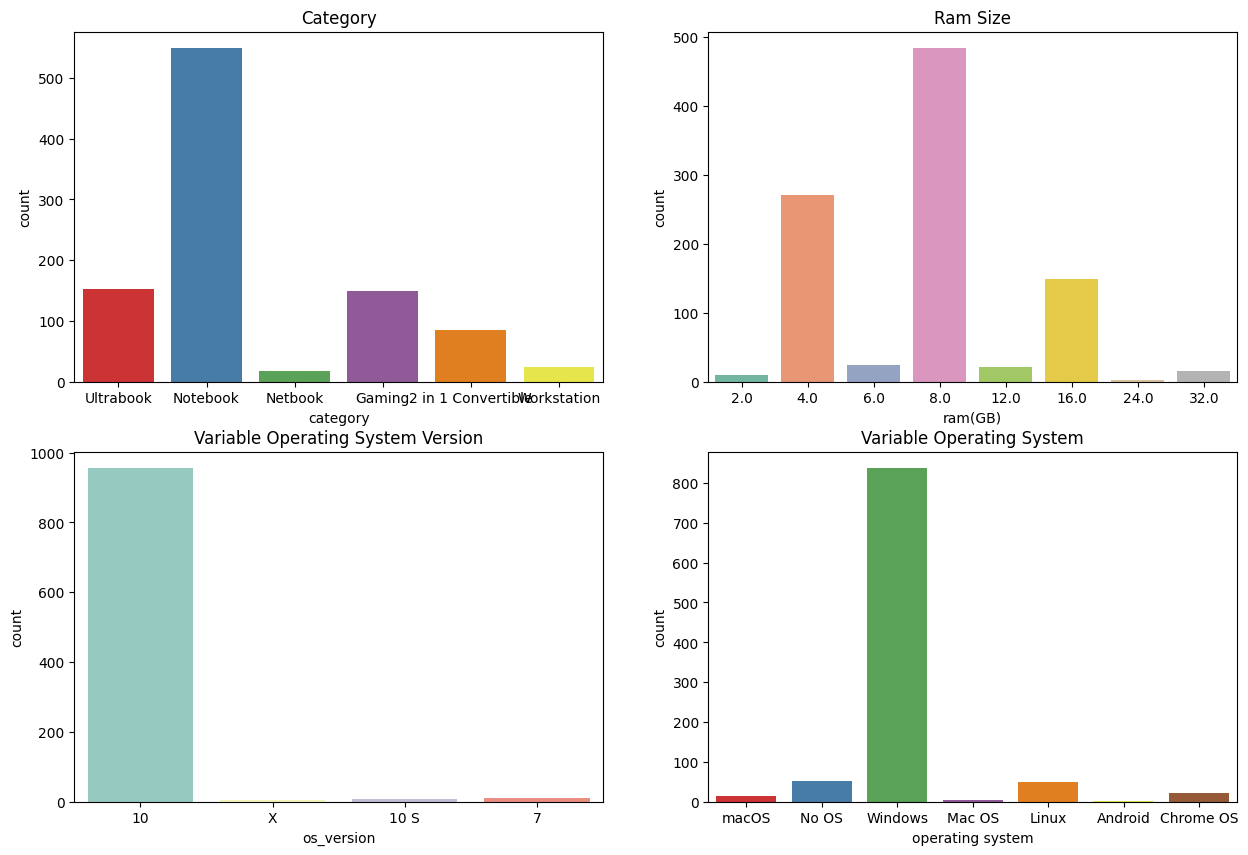

In [78]:
plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1)
plt.gca().set_title('Category')
sns.countplot(x = 'category', palette = 'Set1', data = df_train)

plt.subplot(2, 2, 2)
plt.gca().set_title('Ram Size')
sns.countplot(x = 'ram(GB)', palette = 'Set2', data = df_train)

plt.subplot(2, 2, 3)
plt.gca().set_title('Variable Operating System Version')
sns.countplot(x = 'os_version', palette = 'Set3', data = df_train)

plt.subplot(2, 2, 4)
plt.gca().set_title('Variable Operating System')
sns.countplot(x = 'operating system', palette = 'Set1', data = df_train)
plt.show()

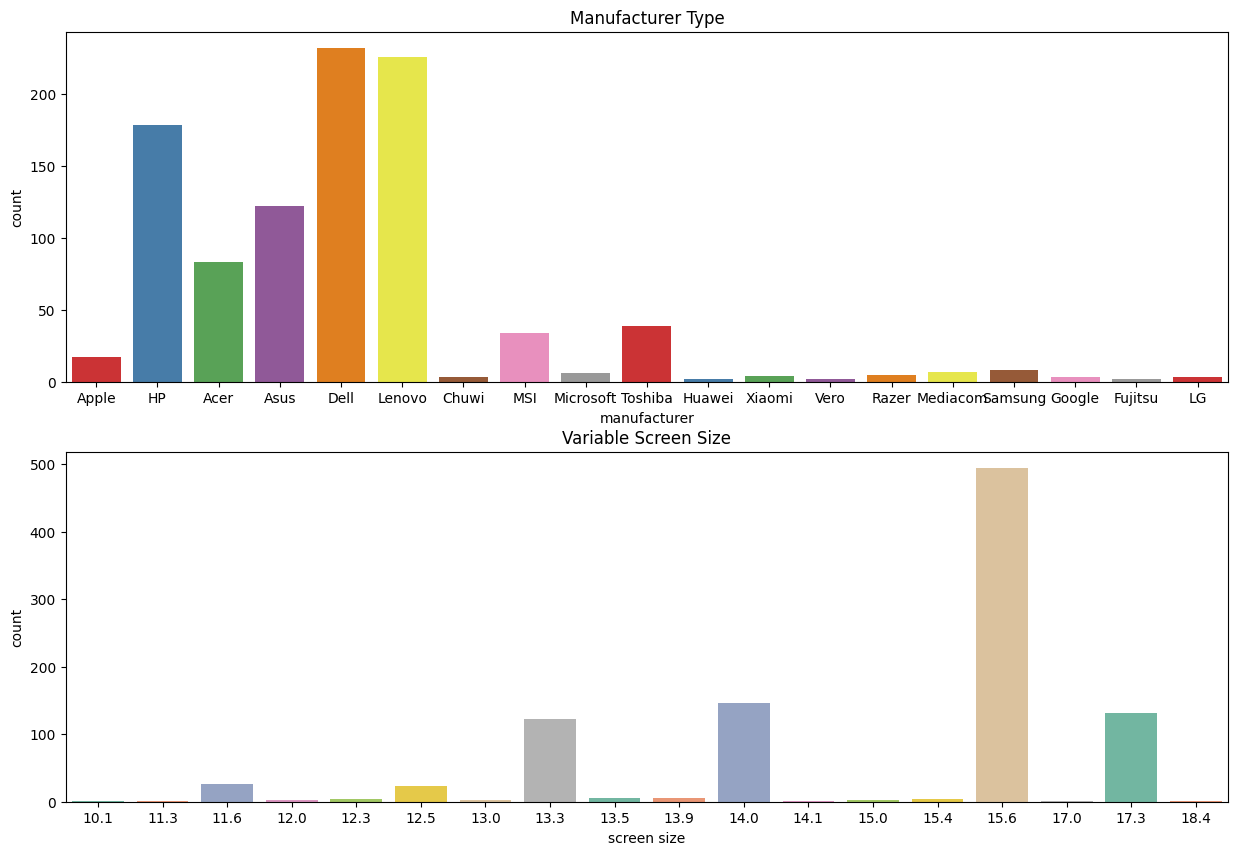

In [79]:
plt.figure(figsize = (15, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Manufacturer Type')
sns.countplot(x = 'manufacturer', palette = 'Set1', data = df_train)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Screen Size')
sns.countplot(x = 'screen size', palette = 'Set2', data = df_train)
plt.show()

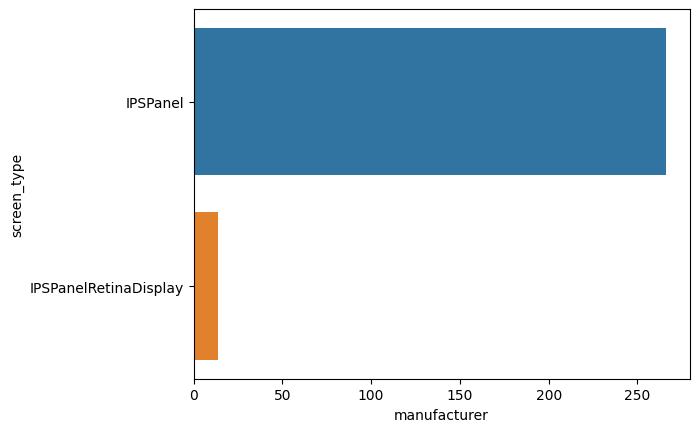

In [80]:
screen = df_train[['screen_type','manufacturer']].groupby('screen_type').agg('count').sort_values('manufacturer', ascending=False).reset_index()
sns.barplot(data=screen.head(10), x="manufacturer", y="screen_type")
plt.show()

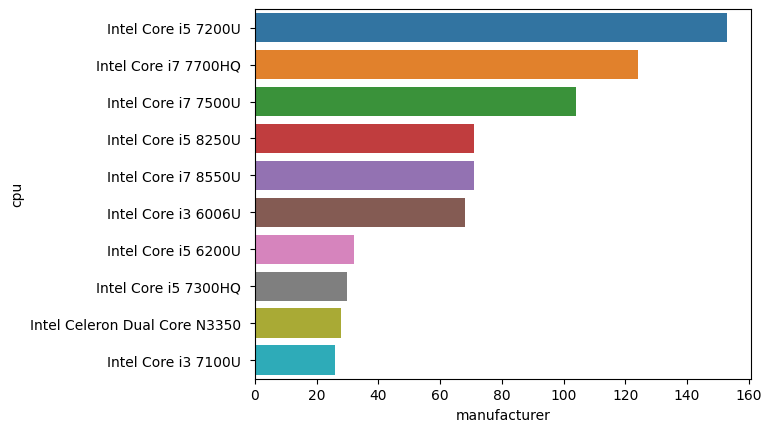

In [81]:
cpu = df_train[['cpu','manufacturer']].groupby('cpu').agg('count').sort_values('manufacturer', ascending=False).reset_index()
sns.barplot(data=cpu.head(10), x="manufacturer", y="cpu")
plt.show()

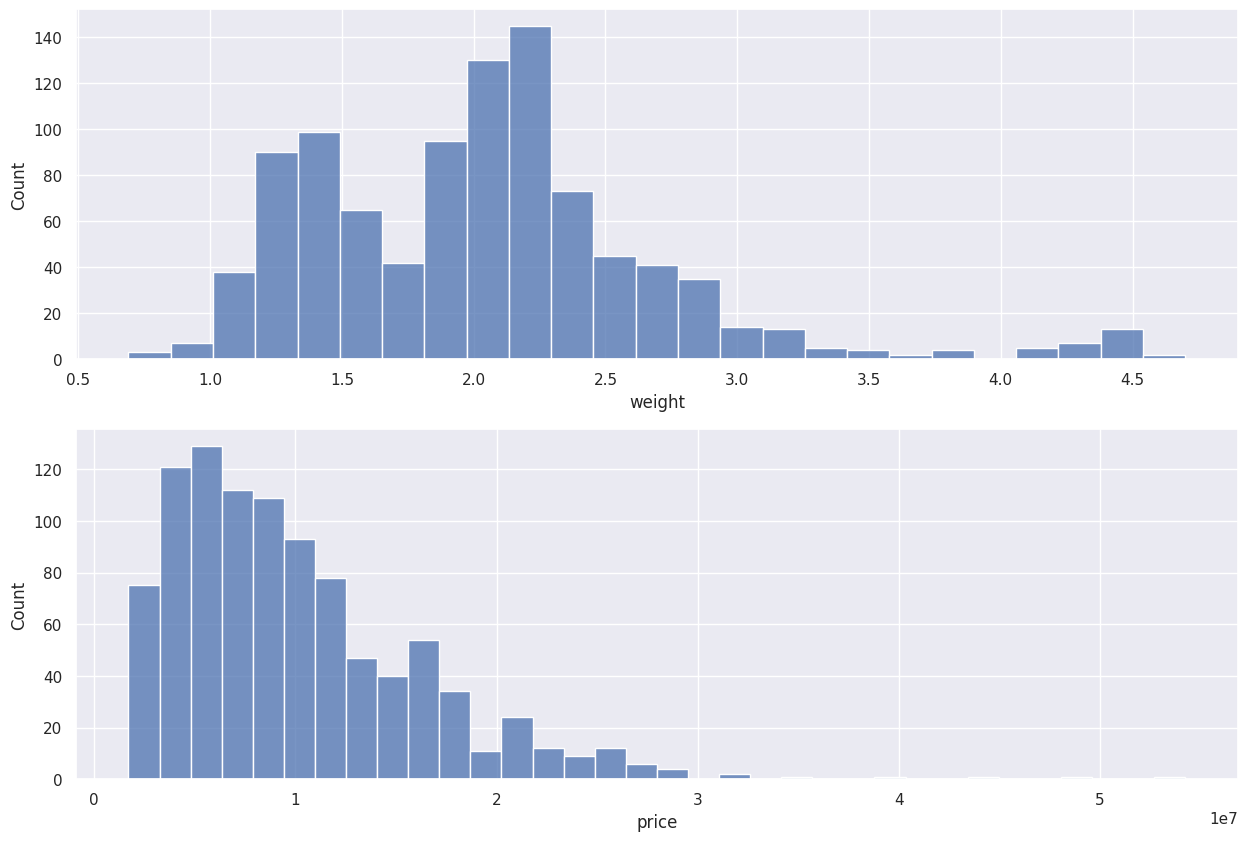

In [82]:
plt.figure(figsize = (15,10))

sns.set(color_codes = True)

plt.subplot(2,1,1)
sns.histplot(df_train['weight'], kde = False)

plt.subplot(2,1,2)
sns.histplot(df_train['price'], kde = False)
plt.show()

In [83]:
df_train.to_csv('laptop-clean-train.csv', index = False)
df_test.to_csv('laptop-clean-test.csv', index = False)

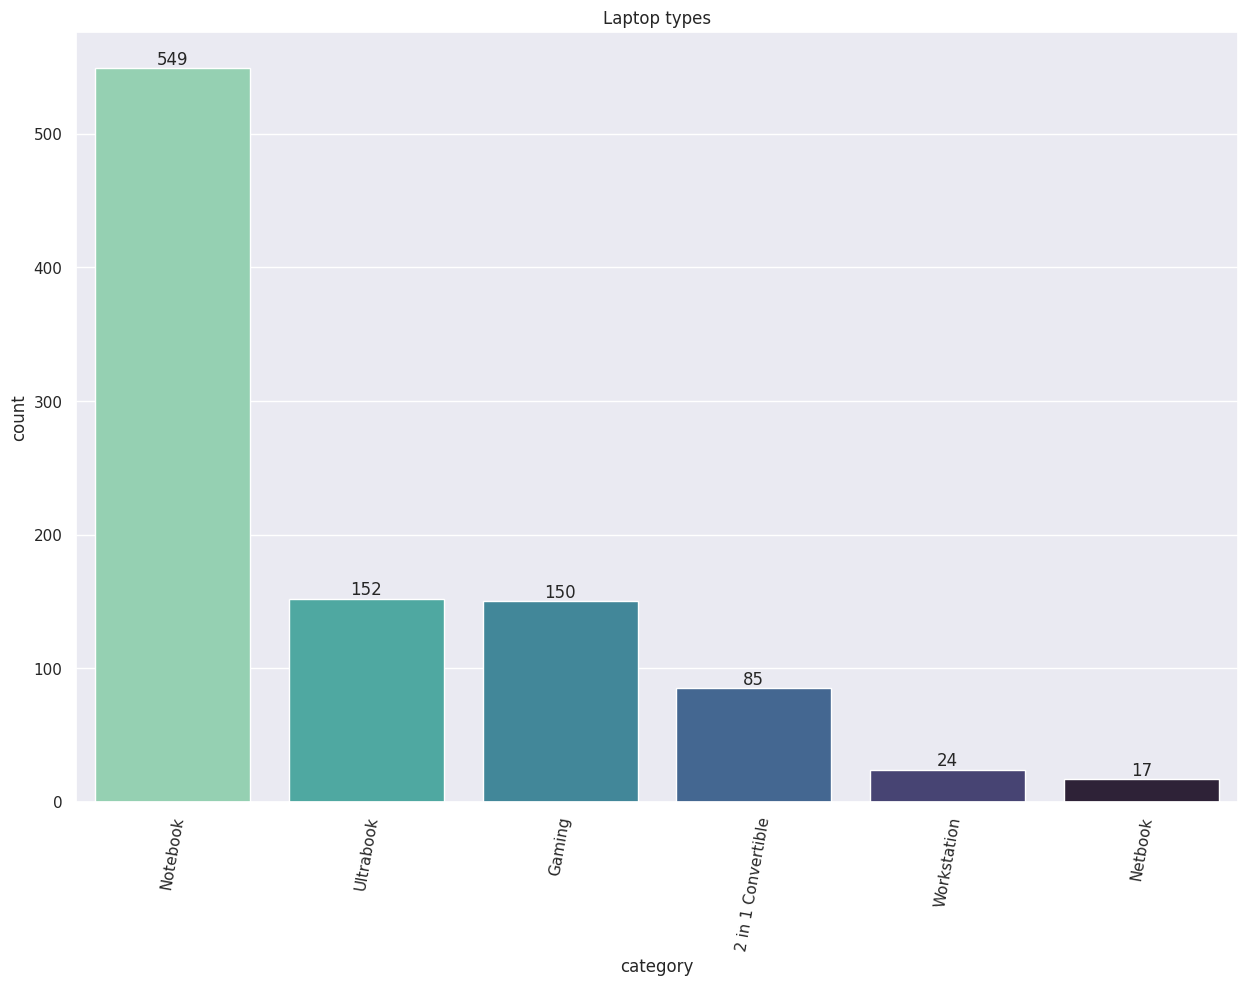

In [84]:
fig, ax  = plt.subplots(figsize = (15,10))
ax=sns.countplot(x = 'category', data = df_train, palette = 'mako_r', order = df_train['category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop types')
plt.show()

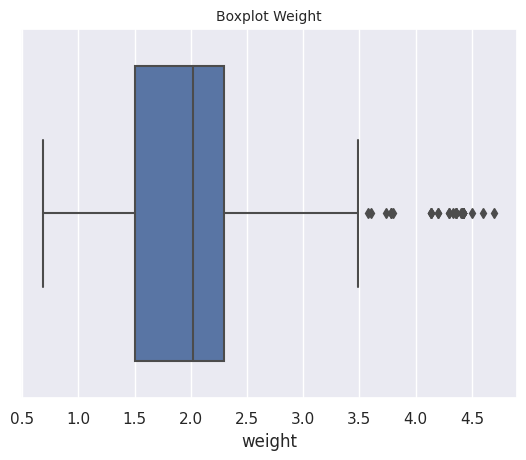

In [85]:
plt.title("Boxplot Weight", fontdict = {'fontsize': 10})
sns.boxplot(x=df_train["weight"])
plt.show()

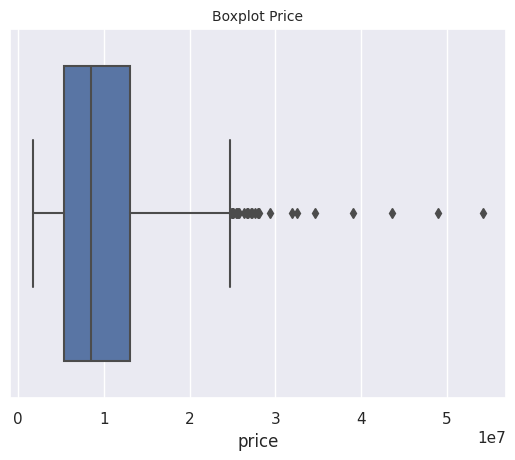

In [86]:
plt.title("Boxplot Price", fontdict = {'fontsize': 10})
sns.boxplot(x=df_train["price"])
plt.show()

<Axes: xlabel='screen size', ylabel='price'>

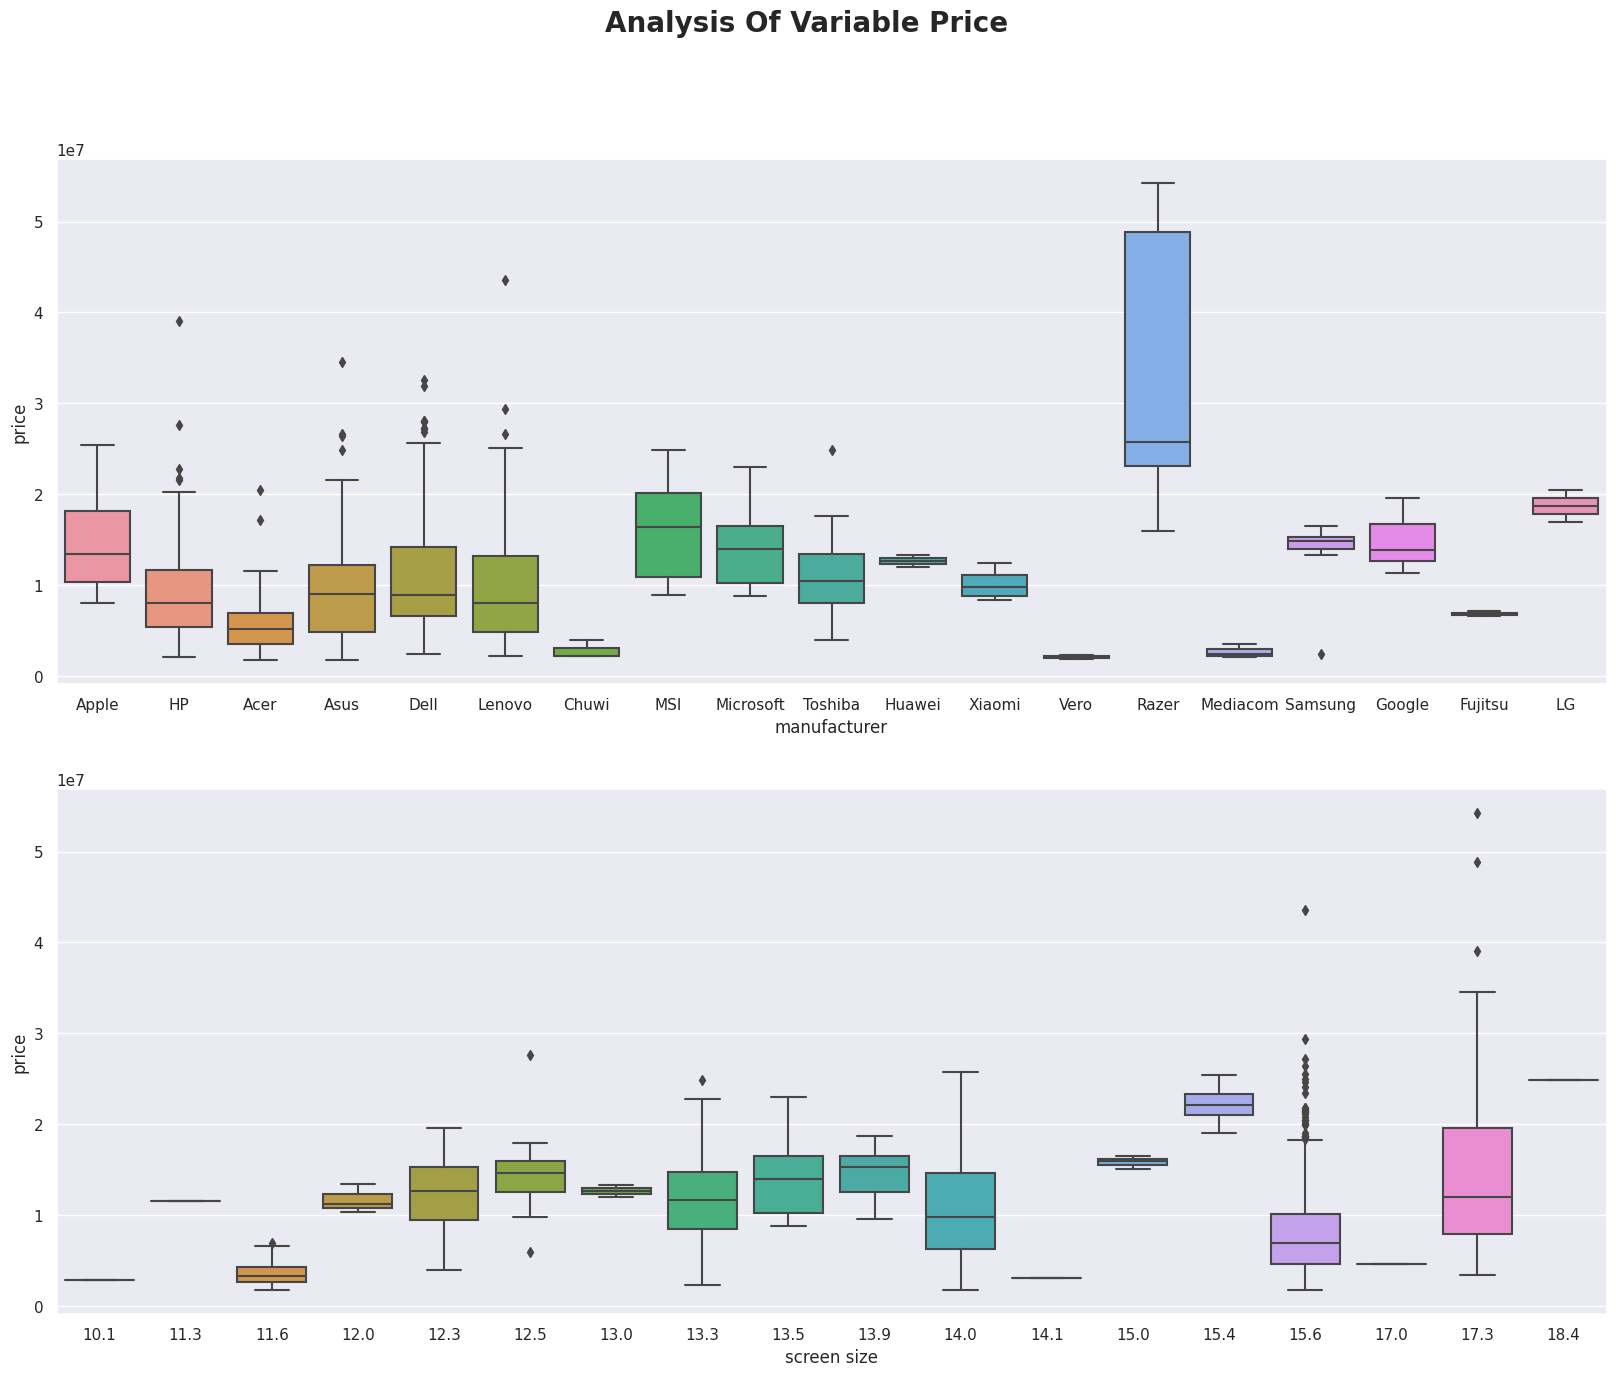

In [87]:
plt.figure(figsize = (20, 15))
plt.suptitle("Analysis Of Variable Price",fontweight="bold", fontsize=20)

ax1 = plt.subplot(2,1,1)
sns.boxplot(x="manufacturer", y="price", data=df_train)

plt.subplot(2,1,2)
sns.boxplot(x="screen size", y="price", data=df_train)

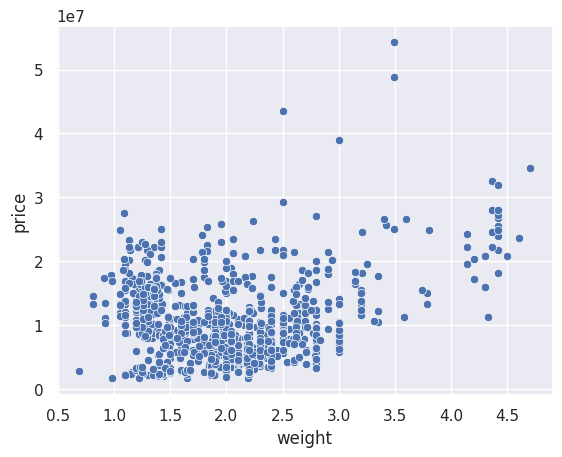

In [88]:
# As the plot describes the weight and price are highly correlated.
sns.scatterplot(data=df_train, x="weight", y="price")
plt.show()

In [89]:
label_encoder_manufacturer = LabelEncoder()
label_encoder_category = OrdinalEncoder()
label_encoder_screen_size = LabelEncoder()
label_encoder_ram = OrdinalEncoder()
label_encoder_storage1_type = LabelEncoder()
label_encoder_storage2_type = LabelEncoder()
label_encoder_operating_system = LabelEncoder()
label_encoder_operating_system_version = LabelEncoder()
label_encoder_cpu_brand = LabelEncoder()
label_encoder_gpu_brand = LabelEncoder()

In [90]:
df_train['manufacturer'] = label_encoder_manufacturer.fit_transform(df_train['manufacturer'])
df_train['category'] = label_encoder_category.fit_transform(df_train['category'].to_frame())
df_train['screen size'] = label_encoder_screen_size.fit_transform(df_train['screen size'])
df_train['ram(GB)'] = label_encoder_ram.fit_transform(df_train['ram(GB)'].to_frame())
df_train['storage_1_type'] = label_encoder_storage1_type.fit_transform(df_train['storage_1_type'])
df_train['storage_2_type'] = label_encoder_storage2_type.fit_transform(df_train['storage_2_type'])
df_train['operating system'] = label_encoder_operating_system.fit_transform(df_train['operating system'])
df_train['os_version'] = label_encoder_operating_system_version.fit_transform(df_train['os_version'])
df_train['cpu_brand'] = label_encoder_cpu_brand.fit_transform(df_train['cpu_brand'])
df_train['gpu_brand'] = label_encoder_gpu_brand.fit_transform(df_train['gpu_brand'])

df_test['manufacturer'] = label_encoder_manufacturer.fit_transform(df_test['manufacturer'])
df_test['category'] = label_encoder_category.fit_transform(df_test['category'].to_frame())
df_test['screen size'] = label_encoder_screen_size.fit_transform(df_test['screen size'])
df_test['ram(GB)'] = label_encoder_ram.fit_transform(df_test['ram(GB)'].to_frame())
df_test['storage_1_type'] = label_encoder_storage1_type.fit_transform(df_test['storage_1_type'])
df_test['storage_2_type'] = label_encoder_storage2_type.fit_transform(df_test['storage_2_type'])
df_test['operating system'] = label_encoder_operating_system.fit_transform(df_test['operating system'])
df_test['os_version'] = label_encoder_operating_system_version.fit_transform(df_test['os_version'])
df_test['cpu_brand'] = label_encoder_cpu_brand.fit_transform(df_test['cpu_brand'])
df_test['gpu_brand'] = label_encoder_gpu_brand.fit_transform(df_test['gpu_brand'])

In [91]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,os_version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand,cpu_group,gpu_group
0,1,MacBook Pro,4.0,7,Intel Core i5,3.0,Intel Iris Plus Graphics 640,6,0,1.37,11912523.48,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,3,0.0,2,1,1,3,2
1,1,Macbook Air,4.0,7,Intel Core i5,3.0,Intel HD Graphics 6000,6,0,1.34,7993374.48,1440x900,NaN,0.0,1.8,128.0,0,0.0,2,1,1,3,4
2,7,250 G6,3.0,14,Intel Core i5 7200U,3.0,Intel HD Graphics 620,4,0,1.86,5112900.00,1920x1080,NaN,0.0,2.5,256.0,3,0.0,2,1,1,4,4
3,1,MacBook Pro,4.0,13,Intel Core i7,5.0,AMD Radeon Pro 455,6,0,1.83,22563005.40,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,3,0.0,2,1,0,1,1
4,1,MacBook Pro,4.0,7,Intel Core i5,3.0,Intel Iris Plus Graphics 650,6,0,1.37,16037611.20,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,3,0.0,2,1,1,3,2


In [92]:
cats = list(df_train.select_dtypes(include=['object']).columns)
nums = list(df_train.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['model name', 'cpu', 'gpu', 'resolution', 'screen_type']
numerical variables:  ['manufacturer', 'category', 'screen size', 'ram(GB)', 'operating system', 'os_version', 'weight', 'price', 'touchscreen', 'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb', 'storage_2_type', 'cpu_brand', 'gpu_brand', 'cpu_group', 'gpu_group']


In [93]:
import warnings
warnings.filterwarnings("ignore")

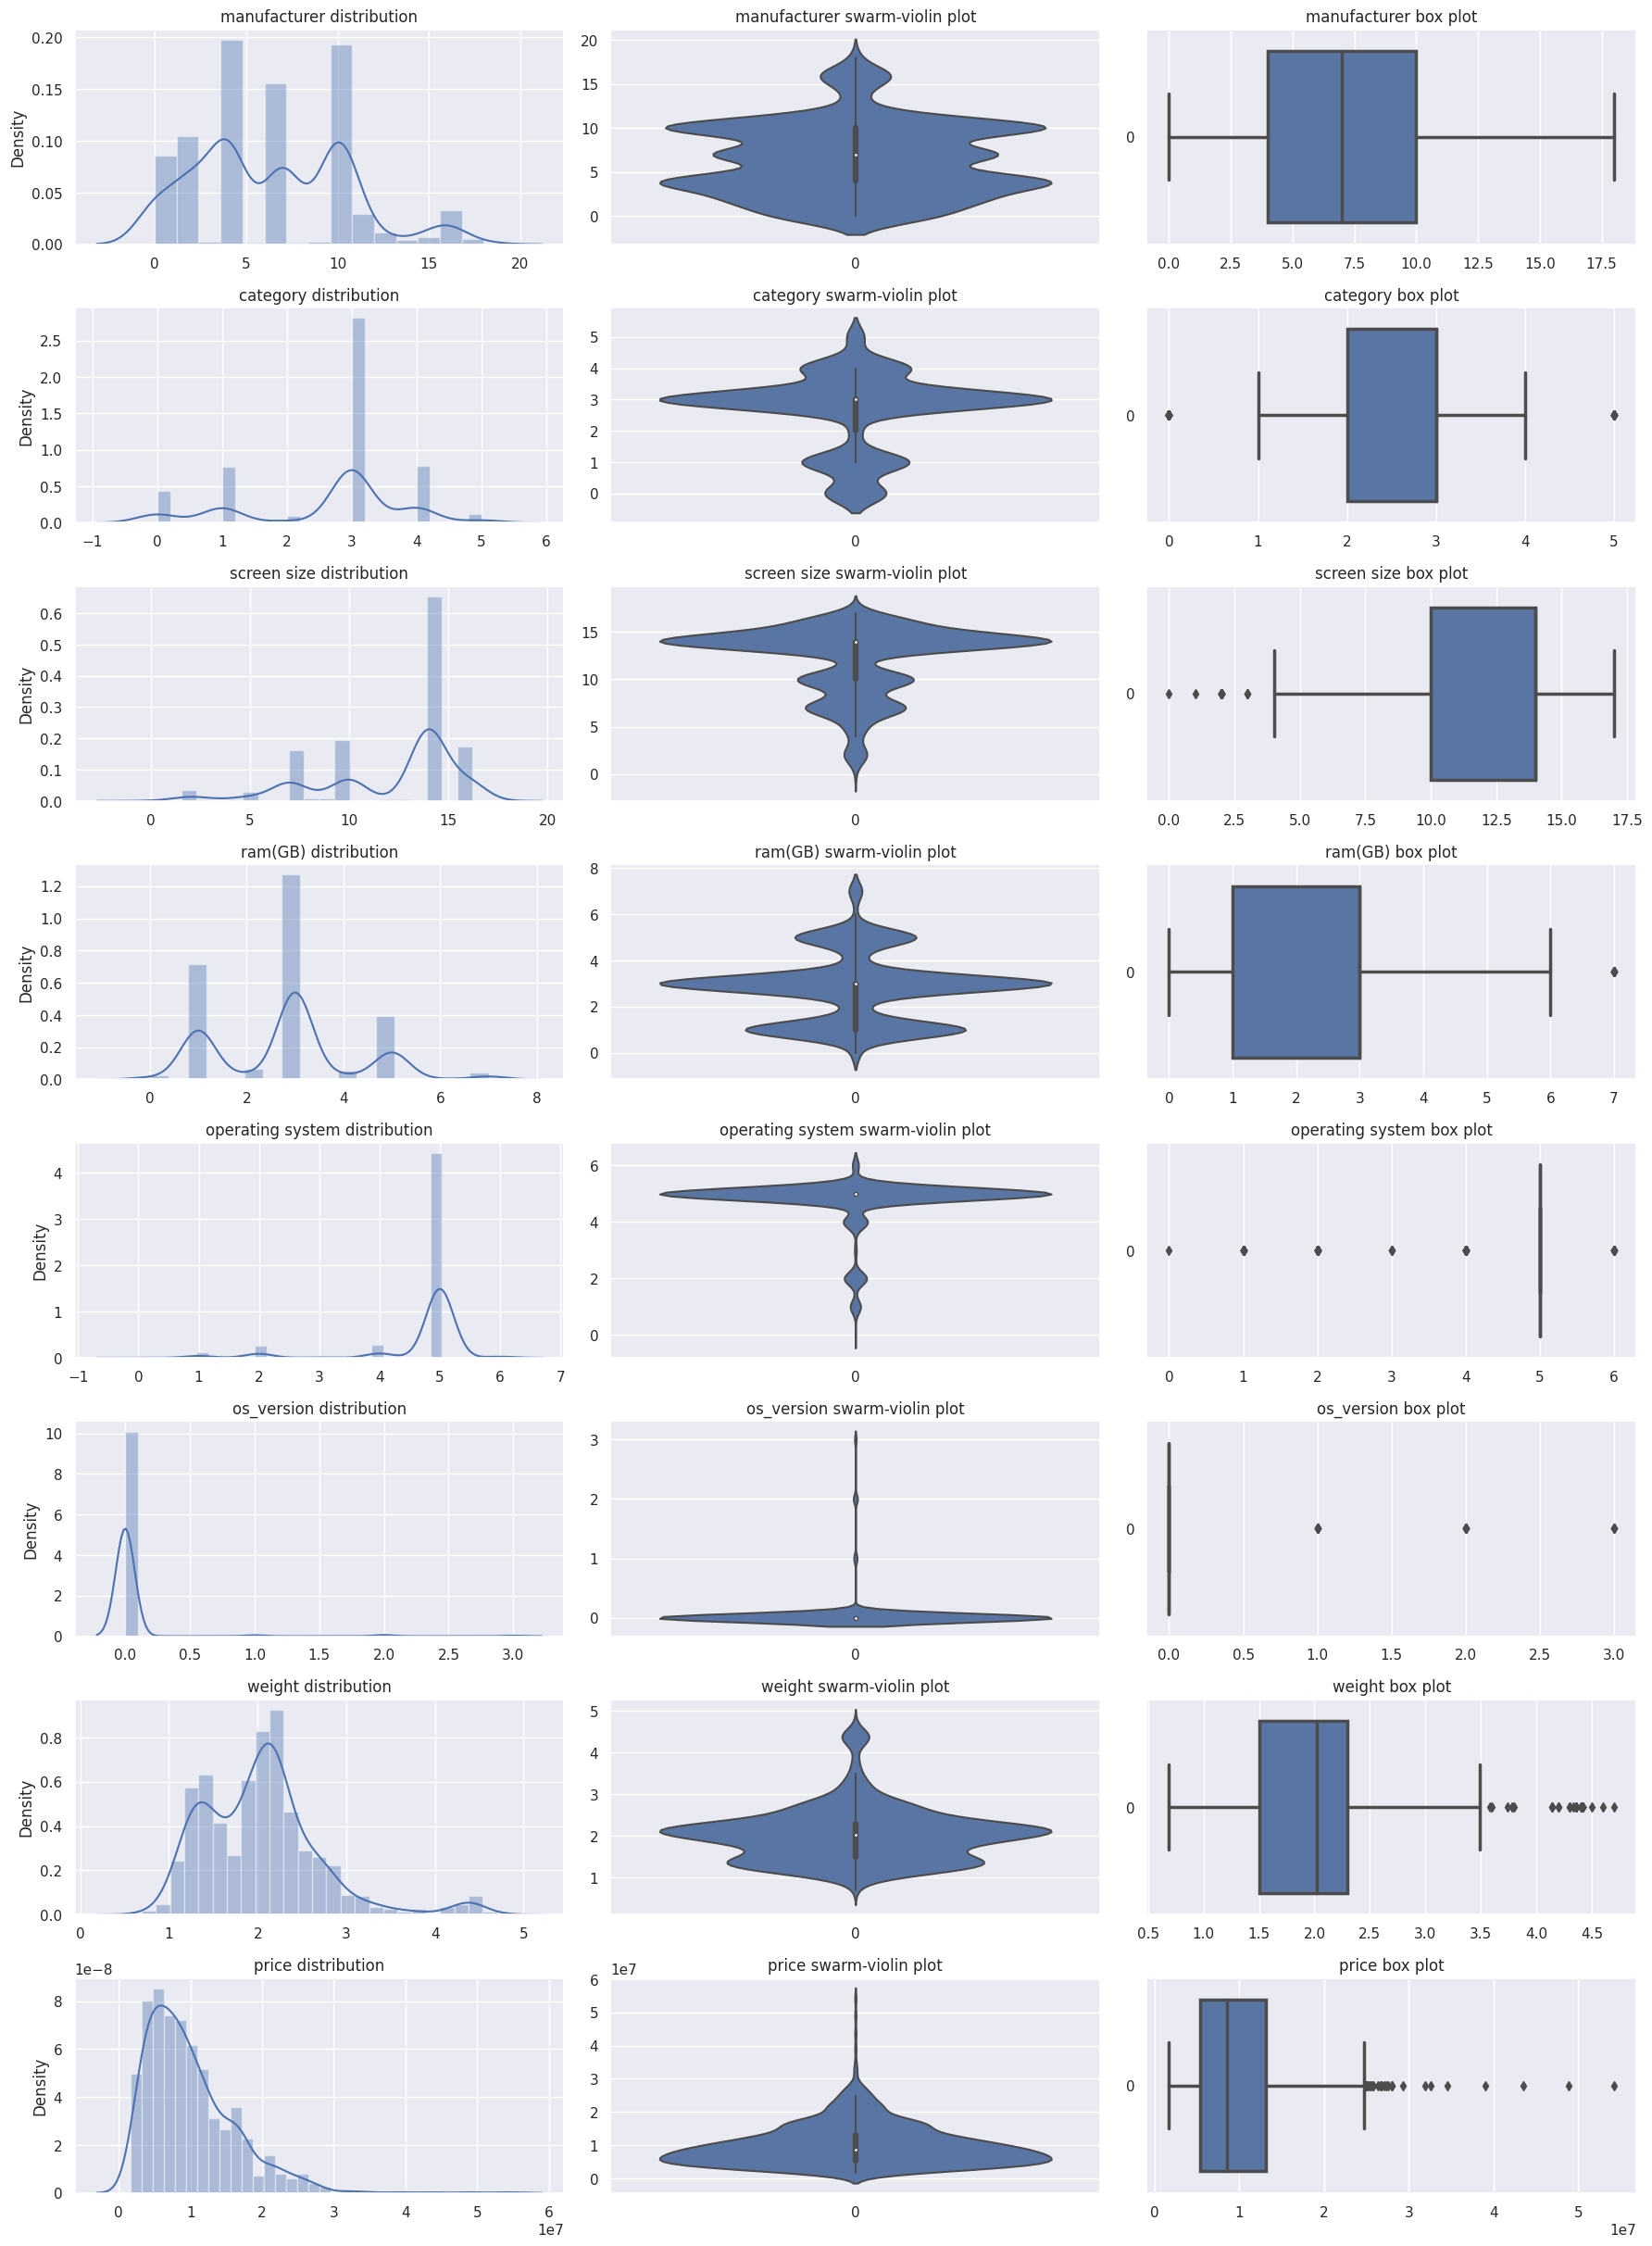

In [94]:
df_num = df_train[nums[:8]]
rows = len(nums)
cols = 3

fig = plt.figure(1, (18, rows*3))

i = 0
for col in nums[:8]:
    
    i += 1
    ax1 = plt.subplot(rows, cols,i)
    sns.distplot(df_num[col])
    ax1.set_xlabel(None)
    ax1.set_title(f'{col} distribution')
    plt.tight_layout()

    i += 1
    ax2 = plt.subplot(rows, cols,i)
    sns.violinplot(df_num[col])
    ax2.set_xlabel(None)
    ax2.set_title(f'{col} swarm-violin plot')
    plt.tight_layout()

    i += 1
    ax3 = plt.subplot(rows, cols,i)
    sns.boxplot(df_num[col], orient='h', linewidth=2.5)
    ax3.set_xlabel(None)
    ax3.set_title(f'{col} box plot')
    plt.tight_layout()
plt.show()

In [95]:
# let's inspect how many unique values are there in each column.
df_train.nunique(axis=0)

manufacturer         19
model name          488
category              6
screen size          18
cpu                  85
ram(GB)               8
gpu                  98
operating system      7
os_version            4
weight              160
price               639
resolution           15
screen_type           2
touchscreen           2
cpu_freq(GHz)        25
storage_1_gb         13
storage_1_type        4
storage_2_gb          6
storage_2_type        3
cpu_brand             2
gpu_brand             3
cpu_group             5
gpu_group             5
dtype: int64

In [96]:
df_train.isna().sum()

manufacturer          0
model name            0
category              0
screen size           0
cpu                   0
ram(GB)               0
gpu                   0
operating system      0
os_version            0
weight                0
price                 0
resolution            0
screen_type         697
touchscreen           0
cpu_freq(GHz)         0
storage_1_gb          0
storage_1_type        0
storage_2_gb          0
storage_2_type        0
cpu_brand             0
gpu_brand             0
cpu_group             0
gpu_group             0
dtype: int64

In [97]:
df_train.duplicated().sum()

0

In [98]:
observed_values = pd.crosstab(df_train['screen_type'], df_train['resolution'])
observed_values

resolution,1366x768,1920x1080,1920x1200,2160x1440,2304x1440,2560x1440,2560x1600,2736x1824,2880x1800,3200x1800,3840x2160
screen_type,,,,,,,,,,,
IPSPanel,11,216,2,2,0,8,0,0,0,5,22
IPSPanelRetinaDisplay,0,0,0,0,3,0,6,1,4,0,0


In [99]:
import scipy.stats as stats
from sklearn import feature_selection
from statsmodels.graphics.gofplots import qqplot

In [100]:
ALPHA = 0.05

In [101]:
chi2, p, dof, expected_values = stats.chi2_contingency(observed_values)
chi2, p, dof, expected_values

(280.00000000000006,
 2.6035746828163285e-54,
 10,
 array([[1.045e+01, 2.052e+02, 1.900e+00, 1.900e+00, 2.850e+00, 7.600e+00,
         5.700e+00, 9.500e-01, 3.800e+00, 4.750e+00, 2.090e+01],
        [5.500e-01, 1.080e+01, 1.000e-01, 1.000e-01, 1.500e-01, 4.000e-01,
         3.000e-01, 5.000e-02, 2.000e-01, 2.500e-01, 1.100e+00]]))

In [102]:
if p <= ALPHA:
    print(f'Rejected H0 under significance level {ALPHA} `screen_type` & `resolution` are dependent.')
else:
    print(f'Fail to reject H0 due to lack of evidence under significance level {ALPHA} `screen_type` & `resolution` are independent.')

Rejected H0 under significance level 0.05 `screen_type` & `resolution` are dependent.


In [103]:
df_cat_label =  df_train[cats[1:]].apply(lambda x: LabelEncoder().fit_transform(x))

df_cat_label.head()

,cpu,gpu,resolution,screen_type
0,46,51,10,1
1,46,45,1,2
2,52,47,3,2
3,60,7,12,1
4,46,52,10,1


In [104]:
chi2_res = feature_selection.chi2(df_cat_label, df_train['model name'])
df_chi2 = pd.DataFrame({
    'attr1': 'model name',
    'attr2': df_cat_label.columns,
    'chi2': chi2_res[0],
    'p': chi2_res[1],
    'alpha': ALPHA
})
df_chi2['H0'] = df_chi2.p.apply(lambda x: 'rejected' if x <= ALPHA else 'fail to reject')
df_chi2['relation'] = df_chi2.H0.apply(lambda x: 'dependent' if x=='rejected' else 'independent')
df_chi2

,attr1,attr2,chi2,p,alpha,H0,relation
0,model name,cpu,4304.393769,0.000000e+00,0.05,rejected,dependent
1,model name,gpu,7500.894933,0.000000e+00,0.05,rejected,dependent
2,model name,resolution,2042.543791,5.417680e-189,0.05,rejected,dependent
3,model name,screen_type,426.031865,9.783082e-01,0.05,fail to reject,independent


In [105]:
from scipy import stats

# define a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(df_train, cols, threshold=3):
    # loop over each selected column
    for col in cols:
        # calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df_train[col]))
        # remove rows with z-score greater than threshold in selected column
        df_train = df_train[(z < threshold) | (df_train[col].isnull())]
    return df_train

In [106]:
# these columns have more number of outliers than other columns.
selected_cols = ['screen size', 'weight','price']
df_train = remove_outliers(df_train, selected_cols)
df_test = remove_outliers(df_test,selected_cols)
print(df_train.shape)
print(df_test.shape)

(942, 23)
(307, 23)


In [107]:
# Removed the skewness from the data using the Power Transformer function. 

from sklearn.preprocessing import PowerTransformer

df_train[nums] = pd.DataFrame(PowerTransformer().fit_transform(df_train[nums]), columns=nums)
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,os_version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand,cpu_group,gpu_group
0,-1.412383,MacBook Pro,1.260026,-1.458212,Intel Core i5,0.292920,Intel Iris Plus Graphics 640,4.694163,-0.151001,-1.146523,0.649237,2560x1600,IPSPanelRetinaDisplay,-0.409006,-0.099862,-1.001352,0.717852,-0.405463,0.405429,0.231714,-0.236218,-1.022413,-2.300749
1,-1.412383,Macbook Air,1.260026,-1.458212,Intel Core i5,0.292920,Intel HD Graphics 6000,4.694163,-0.151001,-1.213280,-0.056290,1440x900,NaN,-0.409006,-1.006976,-1.001352,-1.690047,-0.405463,0.405429,0.231714,-0.236218,-1.022413,0.451915
2,0.266997,250 G6,0.173024,0.545465,Intel Core i5 7200U,0.292920,Intel HD Graphics 620,-1.629026,-0.151001,-0.138926,-0.789685,1920x1080,NaN,-0.409006,0.348119,-0.323153,0.717852,-0.405463,0.405429,0.231714,-0.236218,0.729701,0.451915
3,-1.412383,MacBook Pro,1.260026,0.147081,Intel Core i7,1.586512,AMD Radeon Pro 455,4.694163,-0.151001,-0.196609,1.887402,2880x1800,IPSPanelRetinaDisplay,-0.409006,0.849105,0.489478,0.717852,-0.405463,0.405429,0.231714,-1.727907,-1.795772,-2.308675
4,-1.412383,MacBook Pro,1.260026,-1.458212,Intel Core i5,0.292920,Intel Iris Plus Graphics 650,4.694163,-0.151001,-1.146523,1.208312,2560x1600,IPSPanelRetinaDisplay,-0.409006,2.021672,-0.323153,0.717852,-0.405463,0.405429,0.231714,-0.236218,-1.022413,-2.300749


In [108]:
df_test[nums] = pd.DataFrame(PowerTransformer().fit_transform(df_test[nums]), columns=nums)
df_test.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,os_version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand,cpu_group,gpu_group
0,0.250759,15-bs053od (i7-7500U/6GB/1TB/W10),0.287870,0.566837,Intel Core i7 7500U,-0.281873,Intel HD Graphics 620,0.352815,-0.370185,0.131286,-0.829736,1366x768,NaN,-0.425170,0.870350,1.469574,-1.161171,-0.398109,0.398109,0.129879,-0.190565,0.786994,0.954765
1,-1.154662,Rog GL753VE-DS74,-1.309766,1.671390,Intel Core i7 7700HQ,1.617950,Nvidia GeForce GTX 1050 Ti,0.352815,-0.370185,1.632542,1.130947,1920x1080,NaN,-0.425170,1.229731,-0.503235,0.831269,2.511927,-2.511877,0.129879,1.389104,-1.154329,-0.851332
2,-0.678098,Inspiron 7579,-1.788353,0.566837,Intel Core i7 7500U,1.050542,Intel HD Graphics 620,0.352815,-0.370185,0.393564,0.536326,1920x1080,IPSPanel,2.352002,0.870350,0.401184,0.831269,-0.398109,0.398109,0.129879,-0.190565,0.786994,0.954765
3,2.486021,Portege Z30-C-1CV,0.287870,-1.382212,Intel Core i5 6200U,-1.115594,Intel HD Graphics 520,0.352815,2.701260,-1.590458,0.379039,1920x1080,NaN,-0.425170,-0.328626,-1.239262,0.831269,-0.398109,0.398109,0.129879,-0.190565,0.786994,-0.851332
4,0.706165,IdeaPad 320-15ABR,0.287870,0.566837,AMD A12-Series 9720P,-0.281873,AMD Radeon 530,0.352815,-0.370185,0.410662,-0.908334,1920x1080,NaN,-0.425170,5.143129,-0.503235,0.831269,-0.398109,0.398109,-3.519190,-1.947439,0.786994,0.954765


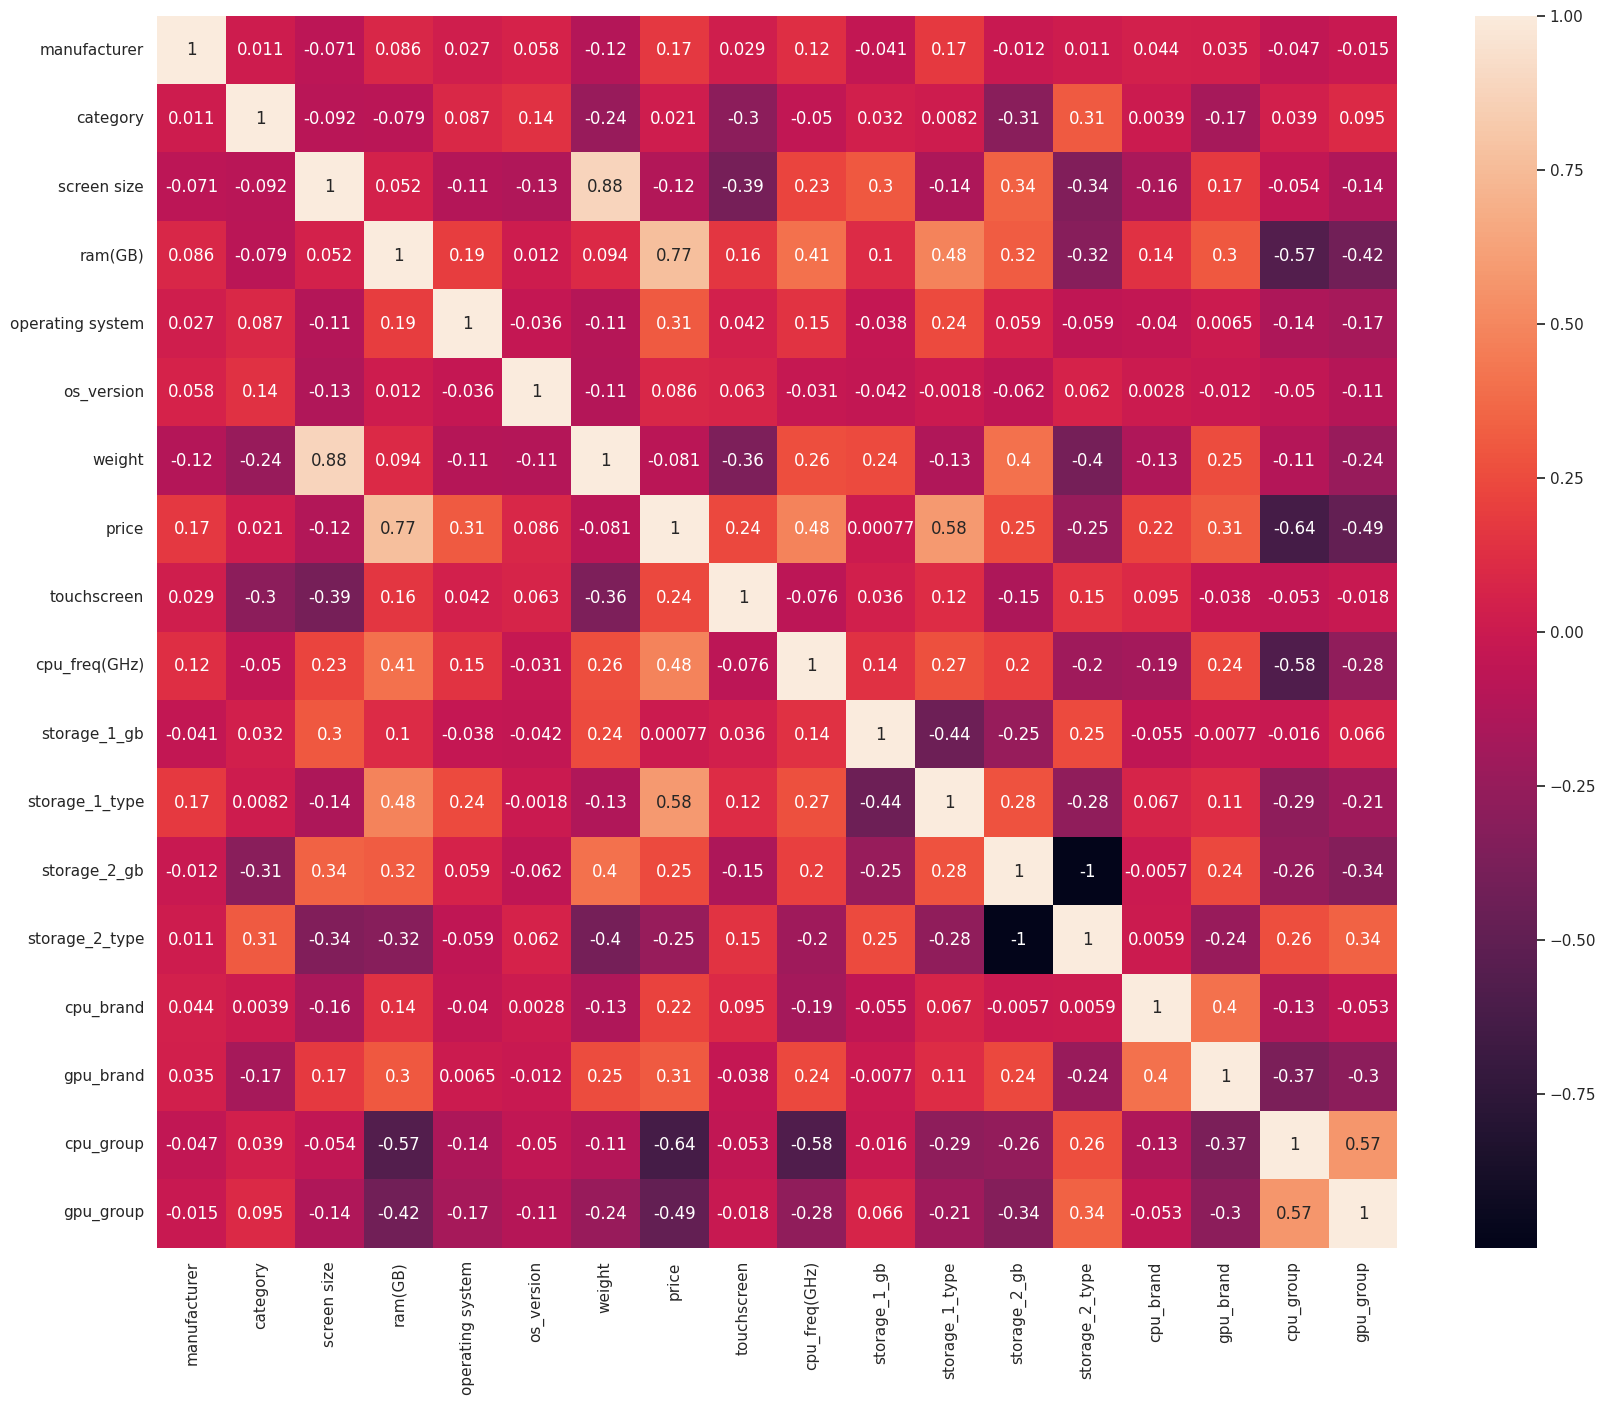

In [109]:
#Correlation Heatmap
#-1 indicates a perfectly negative linear correlation between two variables
# 0 indicates no linear correlation between two variables
# 1 indicates a perfectly positive linear correlation between two variables
# The further away the correlation coefficient is from zero, the stronger the relationship between the two variables.

plt.figure(figsize=(20, 16))
sns.heatmap(df_train.corr(), fmt='.2g', annot=True)
plt.show()

In [110]:
corr_matrix = df_train.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [111]:
# Drop Highly Correlated value from the data Frame.
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
df_train.drop(to_drop[0], axis=1, inplace=True)
df_test.drop(to_drop[0], axis=1, inplace=True)

In [114]:
df_test.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,os_version,price,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand,cpu_group,gpu_group
0,0.250759,15-bs053od (i7-7500U/6GB/1TB/W10),0.287870,0.566837,Intel Core i7 7500U,-0.281873,Intel HD Graphics 620,0.352815,-0.370185,-0.829736,1366x768,NaN,-0.425170,0.870350,1.469574,-1.161171,-0.398109,0.398109,0.129879,-0.190565,0.786994,0.954765
1,-1.154662,Rog GL753VE-DS74,-1.309766,1.671390,Intel Core i7 7700HQ,1.617950,Nvidia GeForce GTX 1050 Ti,0.352815,-0.370185,1.130947,1920x1080,NaN,-0.425170,1.229731,-0.503235,0.831269,2.511927,-2.511877,0.129879,1.389104,-1.154329,-0.851332
2,-0.678098,Inspiron 7579,-1.788353,0.566837,Intel Core i7 7500U,1.050542,Intel HD Graphics 620,0.352815,-0.370185,0.536326,1920x1080,IPSPanel,2.352002,0.870350,0.401184,0.831269,-0.398109,0.398109,0.129879,-0.190565,0.786994,0.954765
3,2.486021,Portege Z30-C-1CV,0.287870,-1.382212,Intel Core i5 6200U,-1.115594,Intel HD Graphics 520,0.352815,2.701260,0.379039,1920x1080,NaN,-0.425170,-0.328626,-1.239262,0.831269,-0.398109,0.398109,0.129879,-0.190565,0.786994,-0.851332
4,0.706165,IdeaPad 320-15ABR,0.287870,0.566837,AMD A12-Series 9720P,-0.281873,AMD Radeon 530,0.352815,-0.370185,-0.908334,1920x1080,NaN,-0.425170,5.143129,-0.503235,0.831269,-0.398109,0.398109,-3.519190,-1.947439,0.786994,0.954765


# Machine Learning Model Building.

In [117]:
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']
print('X_train,y_train:',X_train.shape,y_train.shape)

X_train,y_train: (942, 21) (942,)


In [118]:
X_test = df_test.drop('price',axis=1)
y_test = df_test['price']
print('X_test,y_test:',X_test.shape,y_test.shape)

X_test,y_test: (307, 21) (307,)
